--- Solução do Exercício 3.1 ---
--- 1. Representação Linguística ---
A relação é uma 'relação diagnóstica' Rd que associa um conjunto de Sintomas (S) a um conjunto de Falhas (F) em um automóvel.
Sintomas S = ['low gas mileage (baixo consumo)', 'excessive vibration (vibração excessiva)', 'loud noise (barulho alto)', 'high coolant temperature (temperatura alta do líquido arrefecedor)', 'steering instability (instabilidade na direção)']
Falhas F = ['bad spark plugs (velas ruins)', 'wheel imbalance (rodas desbalanceadas)', 'bad muffler (silenciador ruim)', 'thermostat stuck closed (termostato travado fechado)']


--- 2. Representação como Conjunto de Pares Ordenados (Singletons) ---
Rd = {
  ((x1, y1), 0.90),
  ((x1, y2), 0.10),
  ((x1, y4), 0.20),
  ((x2, y1), 0.30),
  ((x2, y2), 1.00),
  ((x2, y3), 0.10),
  ((x3, y1), 0.20),
  ((x3, y2), 0.10),
  ((x3, y3), 1.00),
  ((x4, y1), 0.10),
  ((x4, y4), 1.00),
  ((x5, y2), 0.90),
}


--- 3. Representação como Grafo Direcionado (Lista de Aresta

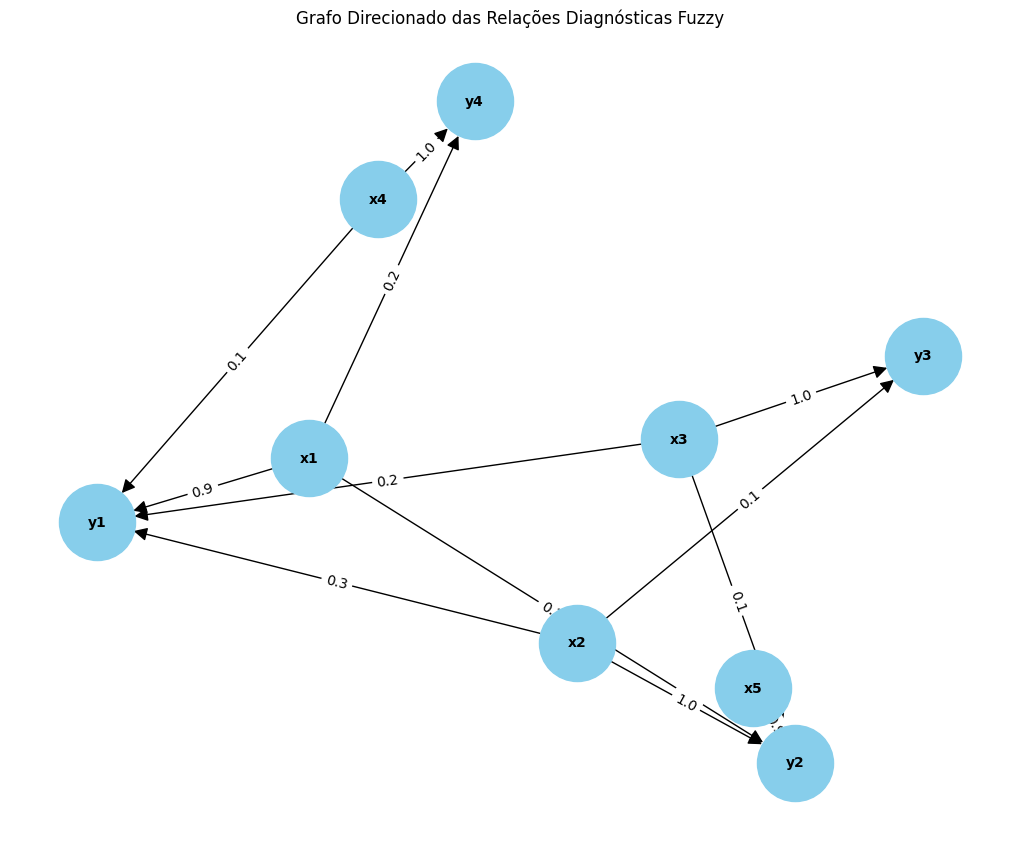

--- 5. Representação como Tabela ---
Falha (F)                      y1 (bad spark plugs)  y2 (wheel imbalance)  \
Sintoma (S)                                                                 
x1 (low gas mileage)                            0.9                   0.1   
x2 (excessive vibration)                        0.3                   1.0   
x3 (loud noise)                                 0.2                   0.1   
x4 (high coolant temperature)                   0.1                   0.0   
x5 (steering instability)                       0.0                   0.9   

Falha (F)                      y3 (bad muffler)  y4 (thermostat stuck closed)  
Sintoma (S)                                                                    
x1 (low gas mileage)                        0.0                           0.2  
x2 (excessive vibration)                    0.1                           0.0  
x3 (loud noise)                             1.0                           0.0  
x4 (high coolant temper

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Problema 3.1: Relação Diagnóstica Fuzzy

# 1. Definição dos Conjuntos S (Sintomas) e F (Falhas)
s_labels = {
    'x1': 'low gas mileage (baixo consumo)',
    'x2': 'excessive vibration (vibração excessiva)',
    'x3': 'loud noise (barulho alto)',
    'x4': 'high coolant temperature (temperatura alta do líquido arrefecedor)',
    'x5': 'steering instability (instabilidade na direção)'
}

f_labels = {
    'y1': 'bad spark plugs (velas ruins)',
    'y2': 'wheel imbalance (rodas desbalanceadas)',
    'y3': 'bad muffler (silenciador ruim)',
    'y4': 'thermostat stuck closed (termostato travado fechado)'
}

# Listas de chaves para facilitar a iteração
s_keys = list(s_labels.keys())
f_keys = list(f_labels.keys())

# 2. Assumir "valores razoáveis" (0-1) para a matriz de relação fuzzy Rd (5x4)
rd_matrix = np.array([
    [0.9, 0.1, 0.0, 0.2],  # x1 (baixo consumo)
    [0.3, 1.0, 0.1, 0.0],  # x2 (vibração)
    [0.2, 0.1, 1.0, 0.0],  # x3 (barulho alto)
    [0.1, 0.0, 0.0, 1.0],  # x4 (temp. alta)
    [0.0, 0.9, 0.0, 0.0]   # x5 (instabilidade direção)
])

# 3. Apresentar as cinco representações da relação (conforme Exemplo 3.1, Fontes 1203-1209)
print("--- Solução do Exercício 3.1 ---")

# Representação 1: Linguística
print("--- 1. Representação Linguística ---")
print("A relação é uma 'relação diagnóstica' Rd que associa um conjunto de Sintomas (S) a um conjunto de Falhas (F) em um automóvel.")
print(f"Sintomas S = {list(s_labels.values())}")
print(f"Falhas F = {list(f_labels.values())}")
print("\n")

# Representação 2: Lista de Pares Ordenados (Singletons)
print("--- 2. Representação como Conjunto de Pares Ordenados (Singletons) ---")
print("Rd = {")
for i in range(len(s_keys)):
    for j in range(len(f_keys)):
        membership = rd_matrix[i, j]
        if membership > 0:  # Omitindo valores 0 para clareza
            print(f"  (({s_keys[i]}, {f_keys[j]}), {membership:.2f}),")
print("}")
print("\n")

# Representação 3: Grafo Direcionado (Fonte 1207)
print("--- 3. Representação como Grafo Direcionado (Lista de Arestas) ---")
print("O grafo direcionado consiste nos nós S e F. As arestas (links) e seus pesos (graus de associação) são:")
for i in range(len(s_keys)):
    for j in range(len(f_keys)):
        membership = rd_matrix[i, j]
        if membership > 0:
            print(f"  ({s_keys[i]}) --[{membership:.2f}]--> ({f_keys[j]})")
print("\n")

# **Atualização**: Gerando o grafo visual utilizando networkx e matplotlib
print("--- 4. Representação Visual como Grafo Direcionado ---")

# Criação do grafo direcionado
G = nx.DiGraph()

# Adicionando os nós
for key, label in s_labels.items():
    G.add_node(key, label=label, type='S')
for key, label in f_labels.items():
    G.add_node(key, label=label, type='F')

# Adicionando as arestas com seus pesos
for i in range(len(s_keys)):
    for j in range(len(f_keys)):
        membership = rd_matrix[i, j]
        if membership > 0:
            G.add_edge(s_keys[i], f_keys[j], weight=membership)

# Desenhando o grafo
pos = nx.spring_layout(G)  # Layout do grafo
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)

# Exibindo pesos nas arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo Direcionado das Relações Diagnósticas Fuzzy")
plt.show()

# Representação 4: Tabela
print("--- 5. Representação como Tabela ---")
# Usando pandas para uma formatação de tabela clara
rd_dataframe = pd.DataFrame(
    rd_matrix,
    index=pd.Index([f"{k} ({v.split(' (')[0]})" for k, v in s_labels.items()], name="Sintoma (S)"),
    columns=pd.Index([f"{k} ({v.split(' (')[0]})" for k, v in f_labels.items()], name="Falha (F)")
)
print(rd_dataframe)
print("\n")

# Representação 5: Matriz
# (Imprimindo esta primeiro, pois é a base das outras)
print("--- 6. Representação como Matriz (Rd) ---")
print(rd_matrix)
print("\n")
